Part 2 of the project. To be submitted by **08/11/2024 23:59**

-> Total = **50** pts

<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>

<h1>Datasets</h1>

In [1]:
### 1- Load the dataset "dataset"
### This dataset should be the app_train from the question 6.a of part 1 (Refer to correction if need be). You can include the previous notebook here, but we recommend instead you export it from previous notebook then load it here.

import pandas as pd

my_dataset = pd.read_csv('../data/app_train_transformed_project1.csv')

#A/ Processing the provided dataset  (review from past assignment, 7 pts)

**1.** Process the categorical features to be correctly handled. Use the most appropriate methods from sklearn (**2** pts)

**2.** Process the anomalies of the dataset (**1** pt)

**3.** Expand the 5 most important features (justify what 'important' means for you) using PolynomialFeatures (**2** pts). You may need to process missing values before.

**4.** Process the features using the best Scaler (**2** pts)

In [2]:
my_dataset.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('bool')], dtype=object)

In [3]:
# Convert all boolean columns to integers in both training and test sets
my_dataset = my_dataset.astype({col: int for col in my_dataset.select_dtypes('bool').columns})

print("Dtypes after conversion:")
print(my_dataset.dtypes.unique())

Dtypes after conversion:
[dtype('int64') dtype('float64')]


In [4]:
my_dataset.shape

(565372, 99)

In [5]:
my_dataset.isnull().sum().sum()

0

In [6]:
my_dataset.columns

Index(['SK_ID_CURR', 'CODE_GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUM

In [7]:
from sklearn.model_selection import train_test_split

X = my_dataset.drop(columns=['TARGET'])
y = my_dataset['TARGET']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Extract feature importances and select the top 5 features
importances = pd.Series(model.feature_importances_, index=X.columns)
top_5_features = importances.nlargest(5).index.tolist()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,0.622246,0.535276,-16765,-1188,-291
1,0.555912,0.729567,-19046,-225,-2531
2,0.650442,0.535276,-19005,-3039,-2437
3,0.322738,0.535276,-19932,-3038,-3458
4,0.354225,0.621226,-16941,-1588,-477
...,...,...,...,...,...
565367,0.150685,0.535276,-20517,-1430,-3990
565368,0.006493,0.488455,-15819,-1646,-4893
565369,0.093748,0.225087,-14601,-2991,-428
565370,0.294801,0.535276,-15446,-341,-4826


In [12]:
from sklearn.preprocessing import PolynomialFeatures

# Extract the top 5 features from the training set
X_top_5_train = X_train[top_5_features]

# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_top_5_train)

# Convert the result back to a DataFrame
poly_feature_names = poly.get_feature_names_out(top_5_features)
X_poly_train_df = pd.DataFrame(X_poly_train, columns=poly_feature_names)

# Display the transformed features
print(X_poly_train_df.head())


   EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
0      0.146590      0.232725     -9877.0         -252.0          -1504.0   
1      0.448285      0.420611    -12823.0        -1275.0          -1115.0   
2      0.543604      0.146442    -15075.0         -161.0          -4428.0   
3      0.007952      0.177704    -21317.0        -1430.0          -4026.0   
4      0.649257      0.535276    -11201.0        -3137.0          -3326.0   

   EXT_SOURCE_2^2  EXT_SOURCE_2 EXT_SOURCE_3  EXT_SOURCE_2 DAYS_BIRTH  \
0        0.021489                   0.034115             -1447.868624   
1        0.200959                   0.188553             -5748.355779   
2        0.295505                   0.079607             -8194.832304   
3        0.000063                   0.001413              -169.517334   
4        0.421535                   0.347532             -7272.332543   

   EXT_SOURCE_2 DAYS_EMPLOYED  EXT_SOURCE_2 DAYS_ID_PUBLISH  EXT_SOURCE_3^2  \
0                  

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaler to the training set
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test set
X_val_scaled = scaler.transform(X_val)


#B/ Basic Machine Learning (8 pts)

In the following, you will use a split of my_dataset between train and validation. The metrics will be evaluated on the validation set.

**5.** Following the lecture and Random Forest example compare the performance of a Random Forest Classifier and a Logistic Regression Classifier:

**5.1** Scale the features (only for Logistic Regression) (**1** pt)

**5.2** Train a Logistic Regression with C = 0.0001  (**1** pt)

**5.3** Evaluate the performance metrics of the Logistic Regression. Which ones are relevant and which are not? (**2** pts)

**5.4** Train a Random Forest Classifier with 100 estimators and the default max_depth (**2** pts)

**5.5** Evaluate the performance metrics of the Random Forest. Which ones are relevant and which are not? (**2** pts)

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale only the training and validation data for Logistic Regression
X_train_scaled_lr = scaler.fit_transform(X_train)
X_val_scaled_lr = scaler.transform(X_val)


In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with C = 0.0001
log_reg = LogisticRegression(C=0.0001, max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_scaled_lr, y_train)


LogisticRegression(C=0.0001, max_iter=1000, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the validation set
y_val_pred_lr = log_reg.predict(X_val_scaled_lr)

# Calculate metrics
accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
precision_lr = precision_score(y_val, y_val_pred_lr)
recall_lr = recall_score(y_val, y_val_pred_lr)
f1_lr = f1_score(y_val, y_val_pred_lr)

# Display results
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")


Logistic Regression Metrics:
Accuracy: 0.6779
Precision: 0.6796
Recall: 0.6724
F1 Score: 0.6760


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Calculate metrics
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
precision_rf = precision_score(y_val, y_val_pred_rf)
recall_rf = recall_score(y_val, y_val_pred_rf)
f1_rf = f1_score(y_val, y_val_pred_rf)

# Display results
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")


Random Forest Metrics:
Accuracy: 0.9985
Precision: 0.9971
Recall: 1.0000
F1 Score: 0.9985


#C/ Machine Learning Hyper-parameter optimization (10 pts)

**6.** Use a grid-search to find a better combination C value and "class_weight" value for the previous Logistic Regression Model (you can do a search manually with a loop or use Scikit-learn grid search features) (**2** pts)

**7.1** Use a random search to find a better combination C value and "class_weight" value for the previous Logistic Regression Model.  (you can do a search manually with a loop or use Scikit-learn grid search features) (**2** pts)

**7.2** How many random iterations are needed to find performances as good as your previous grid search? (**2** pts)


**8.1** Plot how the performance metric selected in 5.5 changes when changing the number of estimators? When changing the depth of the trees (max 10)? (**2** pts)

**8.2** What are the optimal values of these parameters (optimized together)? (**2** pts)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for C and class_weight
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],  # Regularization strength values
    'class_weight': [None, 'balanced']  # Testing with and without balancing
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit GridSearchCV on the scaled training data for Logistic Regression
grid_search.fit(X_train_scaled_lr, y_train)

# Get the best parameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score from Grid Search:", best_score)


Best Parameters: {'C': 10, 'class_weight': None}
Best F1 Score from Grid Search: 0.678705295180724


In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

# Define the parameter distribution for C (loguniform allows for random sampling over orders of magnitude)
param_distributions = {
    'C': loguniform(1e-5, 1e2),  # Log-uniform distribution from 0.00001 to 100
    'class_weight': [None, 'balanced']  # Trying both with and without balancing
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Set up RandomizedSearchCV with 5-fold cross-validation, searching over 20 random combinations
random_search = RandomizedSearchCV(estimator=log_reg, 
                                   param_distributions=param_distributions, 
                                   scoring='f1', 
                                   cv=5, 
                                   n_iter=20,  # Number of random combinations to try
                                   random_state=42, 
                                   n_jobs=-1)

# Fit RandomizedSearchCV on the scaled training data for Logistic Regression
random_search.fit(X_train_scaled_lr, y_train)

# Get the best parameters and the corresponding best score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Best Parameters from Random Search:", best_params_random)
print("Best F1 Score from Random Search:", best_score_random)


Best Parameters from Random Search: {'C': 0.013207763079904542, 'class_weight': None}
Best F1 Score from Random Search: 0.6787677801471489


In [21]:
import numpy as np

# Best F1 score obtained from the grid search
target_f1_score = best_score  # F1 score from grid search

# Track performance as we increase the number of iterations
iterations_needed = 0
found_equivalent_performance = False

for n in range(1, 50):  # Loop up to 50 iterations
    # Perform RandomizedSearchCV with `n_iter` random samples
    random_search = RandomizedSearchCV(
        estimator=log_reg,
        param_distributions=param_distributions,
        scoring='f1',
        cv=5,
        n_iter=n,
        random_state=42,
        n_jobs=-1
    )
    
    # Fit RandomizedSearchCV
    random_search.fit(X_train_scaled_lr, y_train)
    
    # Check if the F1 score meets or exceeds the target from grid search
    if random_search.best_score_ >= target_f1_score:
        iterations_needed = n
        found_equivalent_performance = True
        break  # Stop if we've reached a comparable performance

# Output the result
if found_equivalent_performance:
    print(f"Comparable performance found with {iterations_needed} random iterations.")
else:
    print("Performance did not match within 50 iterations. Consider increasing the limit.")


Comparable performance found with 4 random iterations.


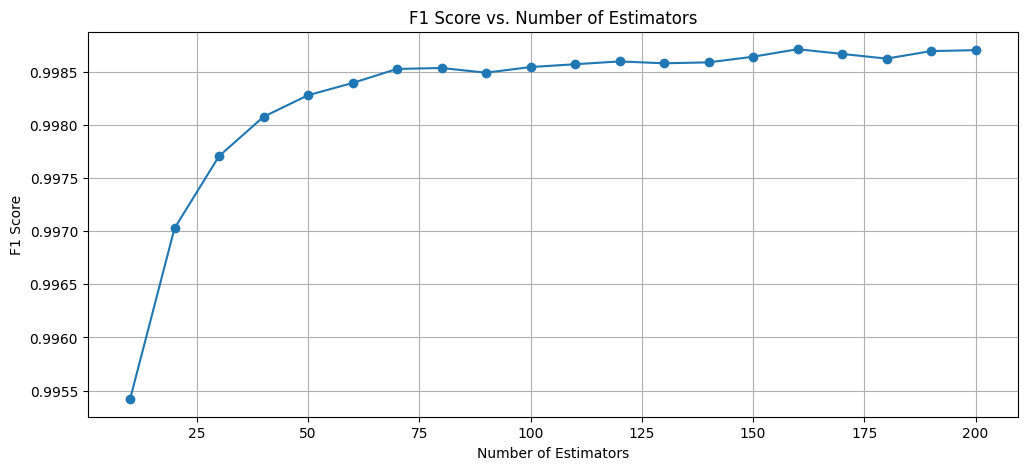

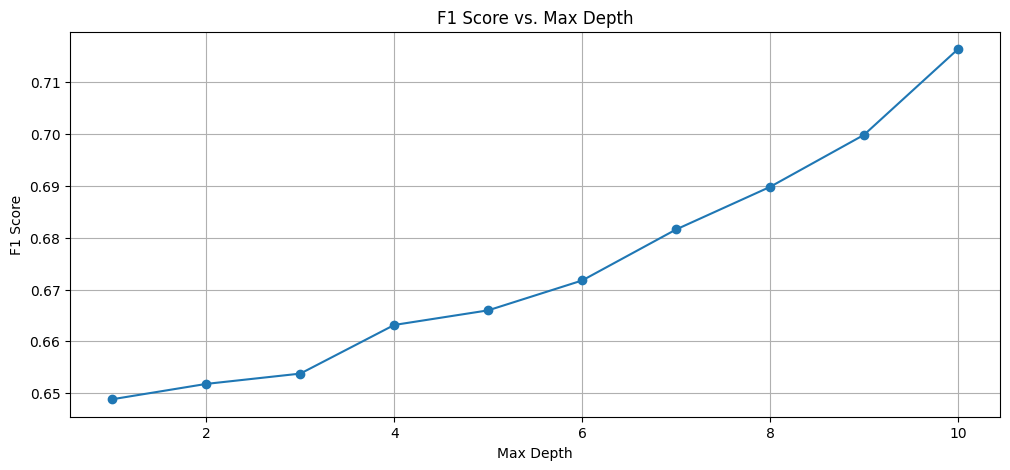

In [23]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Initialize lists to store F1 scores for each parameter setting
f1_scores_estimators = []
f1_scores_depth = []

# Range of estimators to test
estimators_range = range(10, 210, 10)  # 10 to 200 in steps of 10
# Range of depths to test, max depth capped at 10
depth_range = range(1, 11)

# 1. F1 Score vs. Number of Estimators
for n_estimators in estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    f1_scores_estimators.append(f1_score(y_val, y_val_pred))

# 2. F1 Score vs. Max Depth
for max_depth in depth_range:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    f1_scores_depth.append(f1_score(y_val, y_val_pred))

# Plotting F1 Score vs. Number of Estimators
plt.figure(figsize=(12, 5))
plt.plot(estimators_range, f1_scores_estimators, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Number of Estimators')
plt.grid(True)
plt.show()

# Plotting F1 Score vs. Max Depth
plt.figure(figsize=(12, 5))
plt.plot(depth_range, f1_scores_depth, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Max Depth')
plt.grid(True)
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': range(10, 210, 10),  # Test values from 10 to 200 in steps of 10
    'max_depth': range(1, 11)            # Test max depths from 1 to 10
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           scoring='f1', 
                           cv=5, 
                           n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding best score
best_params_rf = grid_search.best_params_
best_score_rf = grid_search.best_score_

print("Optimal Parameters:", best_params_rf)
print("Best F1 Score from Grid Search:", best_score_rf)


/Users/mina/Desktop/3rd_semester/Advanced topics in applied Machine Learning/appliedmlenv/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Optimal Parameters: {'max_depth': 10, 'n_estimators': 200}
Best F1 Score from Grid Search: 0.7176834610282852


#D/ Post Machine Learning Feature inteprepretation (5 pts)

**9.1** Get the features importance of the Optimal Random Forest classifier (obtained in 8) (**2** pts)

**9.2** Are they the features that are the most correlated with the target? (**1** pt)

**10.** Compare the tree structure obtained with visualization (using export_graphviz for instance) of the first tree of your random forest and the last tree of your random forest. How can you explain the differences?  (**2** pts)


In [25]:
import pandas as pd

# Initialize Random Forest with optimal parameters from the grid search
optimal_rf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'], 
                                    max_depth=best_params_rf['max_depth'], 
                                    random_state=42)

# Train the optimal Random Forest model on the entire training data
optimal_rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = optimal_rf.feature_importances_

# Create a DataFrame to display feature names and their importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the sorted feature importances
print("Feature Importances of the Optimal Random Forest Classifier:")
print(importance_df)

Feature Importances of the Optimal Random Forest Classifier:
                       Feature  Importance
0                 EXT_SOURCE_3    0.230288
1                 EXT_SOURCE_2    0.223698
2                DAYS_EMPLOYED    0.059993
3                   DAYS_BIRTH    0.047891
4              AMT_GOODS_PRICE    0.032533
..                         ...         ...
93  NAME_FAMILY_STATUS_Unknown    0.000000
94            FLAG_DOCUMENT_10    0.000000
95            FLAG_DOCUMENT_12    0.000000
96                  FLAG_MOBIL    0.000000
97             FLAG_DOCUMENT_4    0.000000

[98 rows x 2 columns]


In [26]:
# Add the target column back to the training set for correlation calculation
X_train_with_target = X_train.copy()
X_train_with_target['TARGET'] = y_train

# Calculate correlation of each feature with the target
correlations = X_train_with_target.corr()['TARGET'].drop('TARGET').abs()

# Create a DataFrame to show features and their correlations with the target
correlation_df = pd.DataFrame({
    'Feature': correlations.index,
    'Correlation': correlations.values
}).sort_values(by='Correlation', ascending=False).reset_index(drop=True)

print("Features Most Correlated with Target:")
print(correlation_df)

# Compare with the feature importance rankings
print("\nTop Features by Importance vs. Correlation with Target:")
comparison_df = importance_df.merge(correlation_df, on='Feature')
print(comparison_df.head(10))


Features Most Correlated with Target:
                                 Feature  Correlation
0                           EXT_SOURCE_2     0.270405
1                           EXT_SOURCE_3     0.265771
2                             DAYS_BIRTH     0.145461
3                          DAYS_EMPLOYED     0.122592
4   NAME_EDUCATION_TYPE_Higher education     0.111638
..                                   ...          ...
93            AMT_REQ_CREDIT_BUREAU_HOUR     0.001184
94          NAME_FAMILY_STATUS_Separated     0.000979
95                       FLAG_DOCUMENT_5     0.000767
96   WEEKDAY_APPR_PROCESS_START_THURSDAY     0.000608
97       NAME_TYPE_SUITE_Group of people     0.000005

[98 rows x 2 columns]

Top Features by Importance vs. Correlation with Target:
                                Feature  Importance  Correlation
0                          EXT_SOURCE_3    0.230288     0.265771
1                          EXT_SOURCE_2    0.223698     0.270405
2                         DAYS_EMPLOYED

In [29]:
%pip install graphviz

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.tree import export_graphviz
import graphviz

# Extract the first and last trees from the optimized Random Forest model
first_tree = optimal_rf.estimators_[0]
last_tree = optimal_rf.estimators_[-1]

# Visualize the first tree
export_graphviz(first_tree, out_file="first_tree.dot", feature_names=X_train.columns, 
                filled=True, rounded=True, special_characters=True)

# Convert .dot file to PNG or directly render with graphviz
with open("first_tree.dot") as f:
    dot_graph = f.read()
first_tree_viz = graphviz.Source(dot_graph)
first_tree_viz.render("first_tree", format="png", cleanup=True)
first_tree_viz

# Visualize the last tree
export_graphviz(last_tree, out_file="last_tree.dot", feature_names=X_train.columns, 
                filled=True, rounded=True, special_characters=True)

with open("last_tree.dot") as f:
    dot_graph = f.read()
last_tree_viz = graphviz.Source(dot_graph)
last_tree_viz.render("last_tree", format="png", cleanup=True)
last_tree_viz


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.2807 to fit
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.28236 to fit


#E/ Evasion attacks (12pts)

**11.** Implement the Algorithm 2 from the research paper in https://arxiv.org/pdf/1605.07277.pdf

Section 6.5 of the research paper describes the intuition of the algorithm and the different parameters (**5** pts).

PS: the whole paper gives you a good understand of adversarial attacks and is a recommended reading

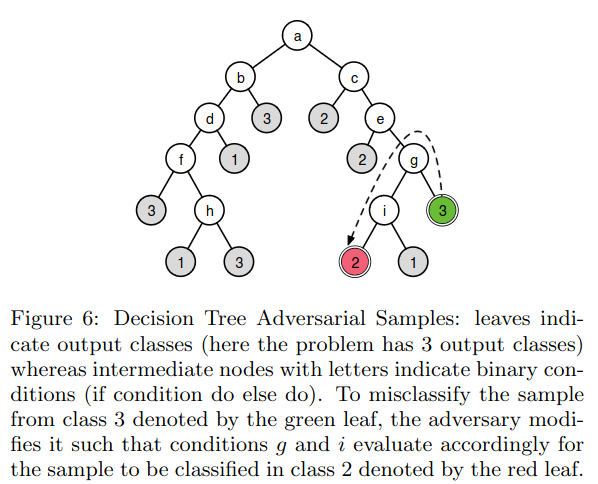

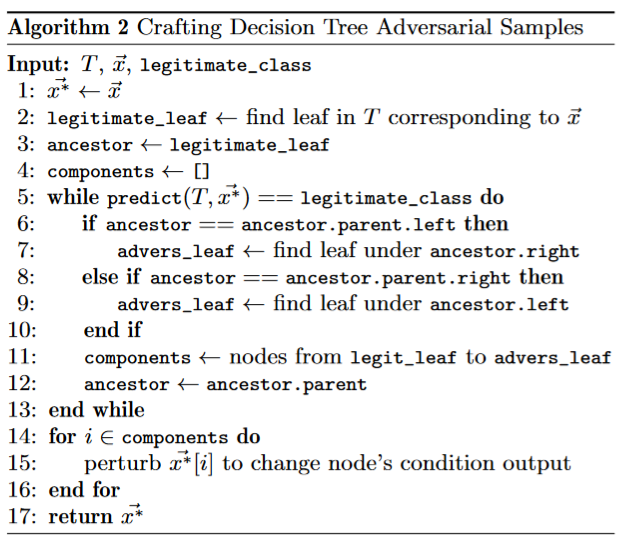

In [ ]:
def my_decision_tree_attack(model, x):
  x_adv = x
  ## generate the adversarials

  return x_adv

**12.1** Either using the attack you implemented in question 11. or using the library Adversarial Robustness Toolbox (https://github.com/Trusted-AI/adversarial-robustness-toolbox/), generate a Decision Tree Attack on the validation set on the first tree of the random forest (cf question 10). (**5** pts).


**12.2** Evaluate the AUC on the generated adversarial examples. It should be lower than the AUC obtained on question 8.2. (**2** pts).

#F/ Semi-supervised Learning (8pts)

It is recommended to optimize the hyper parameters of each of the techniques

**13.1** Using LabelPropagation from sklearn library, fit the labels using the validation set and infer the labels of the training set (**3** pts)

**13.2** Using LabelSpreading from sklearn library, fit the labels using the validation set and infer the labels of the training set (**3** pts)

**14.** Compare the silhouette performance metrics and the accuracy of the labels of the clusters obtained using each technique. (**2** pts)